# Supervised learning solution
Machine learning
Team members: Ivan Mayo, Braulio Millán, Axel Esdras Flores, Ricardo Hernández


For this project, we intend to tackle the systems a home cleaning robot (for example, roombas) use for object identification. To identify obstacles, our robot would have an integrated camera that will face forward and detect objects in the path of the robot. To start, we plan to create a model that will identify between doors and chairs.

The code we made uses tensorflow to classify images. Tensorflow is an open source platform for machine learning, and can be used to train ML models. We will use Tensorflow to program a CNN image classifier.

# Installing the necessary depenedencies

Since we are working with images, we will use the libraries for tensorflow, opencv, and matplotlib.

Tensorflow is what we will use to build the model, while opencv is used modify images to make them easier to process in the model.

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib
!pip install --upgrade opencv-python


In [ ]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

# Removing missing or incorrect images

We need to check for missing or incorrect images. These error images can cause the model to break and deliver an incorrect output.

The dataset we are going to work with contains images of different types of doors and chairs

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/datos'

In [ ]:
# os.listdir(data_dir)
os.listdir(os.path.join(data_dir, 'Door'))

['image2.jpeg',
 'image3.jpeg',
 'doors.jpg',
 'image6.jpeg',
 'image8.jpeg',
 'OIP.P48F7sOV8w6q8_UC6wTrgwHaLI.jpg',
 'cea543f4fadfe0445fb3f055eb74ea84.jpg',
 'image10.jpeg',
 'image9.jpeg',
 'image.jpeg',
 'image12.jpeg',
 'image4.jpeg',
 'OIP.TFi3npOXl5wCh-M22y9AfwHaJ4.jpg',
 'image5.jpeg',
 'OIP.Muy4GkHvRkBkAkcjY6GBeQHaLV.jpg',
 'image11.jpeg',
 'image7.jpeg',
 'OIP.tq7AvGtinf3uXFF-j1hA1QHaJ4.jpg',
 'OIP.rt3Lm2hlJRmTzvmAartFFAHaLe.jpg',
 'OIP.BjqtjgCxFFDVshSmpVW0NwHaLH.jpg',
 'OIP.7U8sZZssC08dWj9LWOW61gHaLH.jpg',
 'OIP.Iv_3D7FAHUHbwwz62vk4AAHaJ4.jpg',
 'OIP.itzzn0NbHISebF2nFT55AAHaLI.jpg',
 'OIP.WxFrnxoeE3BZvDtHvDXJIgAAAA.jpg',
 'OIP.IMV5Fh-a0Z7UczDkMB6wqQHaNK.jpg',
 'OIP.-z4xbGTszcQg-P0HIdoP4QHaLh.jpg',
 'OIP.HRUv8WZo7ODl-0rWykR_EQHaJ4.jpg',
 'OIP.HDh9pVKvQLCD-9LLWQ70MQHaG5.jpg',
 'OIP.XUX1b4CH5jUZQZssZlTGTgHaE8.jpg',
 'OIP.WxfObIouuB812Uo7xGf7QwHaLH.jpg',
 'OIP._-djOOOc_uCOba1ia8B34QHaJ4.jpg',
 'OIP.11XZqmYp2X1f-uRlAlivfwHaLY.jpg',
 'OIP.Gc39P-H9q7YAoxSymii2cwHaLG.jpg',
 'da0dcfcf

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

Door
Chair


We have two classes: Doors and Chairs

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

image2.jpeg
image3.jpeg
doors.jpg
image6.jpeg
image8.jpeg
OIP.P48F7sOV8w6q8_UC6wTrgwHaLI.jpg
cea543f4fadfe0445fb3f055eb74ea84.jpg
image10.jpeg
image9.jpeg
image.jpeg
image12.jpeg
image4.jpeg
OIP.TFi3npOXl5wCh-M22y9AfwHaJ4.jpg
image5.jpeg
OIP.Muy4GkHvRkBkAkcjY6GBeQHaLV.jpg
image11.jpeg
image7.jpeg
OIP.tq7AvGtinf3uXFF-j1hA1QHaJ4.jpg
OIP.rt3Lm2hlJRmTzvmAartFFAHaLe.jpg
OIP.BjqtjgCxFFDVshSmpVW0NwHaLH.jpg
OIP.7U8sZZssC08dWj9LWOW61gHaLH.jpg
OIP.Iv_3D7FAHUHbwwz62vk4AAHaJ4.jpg
OIP.itzzn0NbHISebF2nFT55AAHaLI.jpg
OIP.WxFrnxoeE3BZvDtHvDXJIgAAAA.jpg
OIP.IMV5Fh-a0Z7UczDkMB6wqQHaNK.jpg
OIP.-z4xbGTszcQg-P0HIdoP4QHaLh.jpg
OIP.HRUv8WZo7ODl-0rWykR_EQHaJ4.jpg
OIP.HDh9pVKvQLCD-9LLWQ70MQHaG5.jpg
OIP.XUX1b4CH5jUZQZssZlTGTgHaE8.jpg
OIP.WxfObIouuB812Uo7xGf7QwHaLH.jpg
OIP._-djOOOc_uCOba1ia8B34QHaJ4.jpg
OIP.11XZqmYp2X1f-uRlAlivfwHaLY.jpg
OIP.Gc39P-H9q7YAoxSymii2cwHaLG.jpg
da0dcfcfecd2e3fc82ad2806745c8d11.jpg
OIP.61UhBRnt4Is0iVd8EgcgBwHaKC.jpg
front-door.jpg
OIP.Vbmp3QswMB8YJ_3a-2gb1AHaLF.jpg
OIP.VtvF0zotVXB6NIWf

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'Door','Rock-Doors-002.jpg'))
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(789, 582, 3)


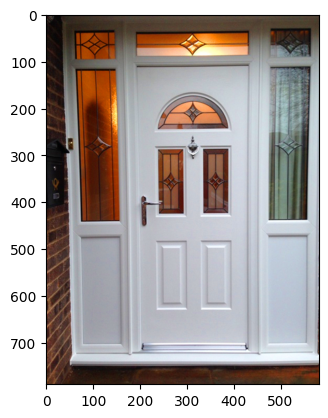

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading the dataset

In [ ]:
tf.data.Dataset??

In [ ]:
tf.keras.utils.image_dataset_from_directory??

# Pipeline model

A pipeline is a linear sequence of data preparation options, modeling operations, and prediction transform operations.

It allows the sequence of steps to be specified, evaluated, and used as an atomic unit.

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/datos')

Found 271 files belonging to 2 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
# every time it compiles changes the batch
batch = data_iterator.next()

  Images as NP Arrays

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# example of setting keras
# data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/datos', batch_size=9, image_size=(128,128))

In [ ]:
# class 0 is chair
# class 1 is door
batch[1]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

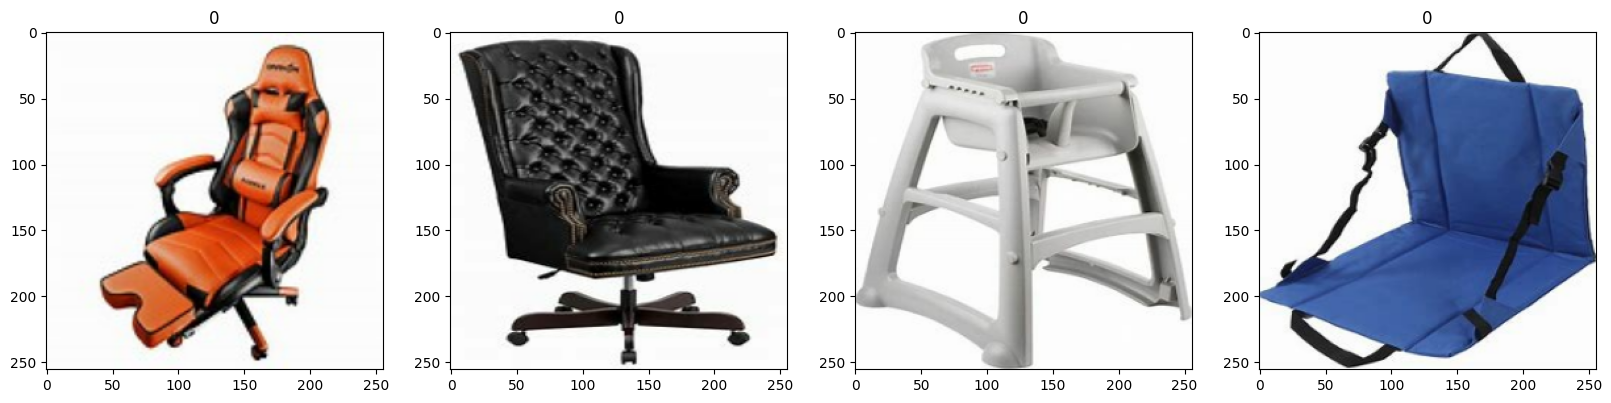

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Data preprocessing

In [ ]:
batch[0].max()
batch[0].min()

0.0

In [ ]:
scaled = batch[0]/255

In [ ]:
scaled.max()

1.0

# LAMBDA

Training the model takes computational power and time. To reduce the time needed, this function transforms images so that some of their values are reduced and make it easier to process.

In [ ]:
data = data.map(lambda x,y: (x/255,y)) # X images, Y are target variables

In [ ]:
sacaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = sacaled_iterator.next()

In [ ]:
batch[0].min()

0.0

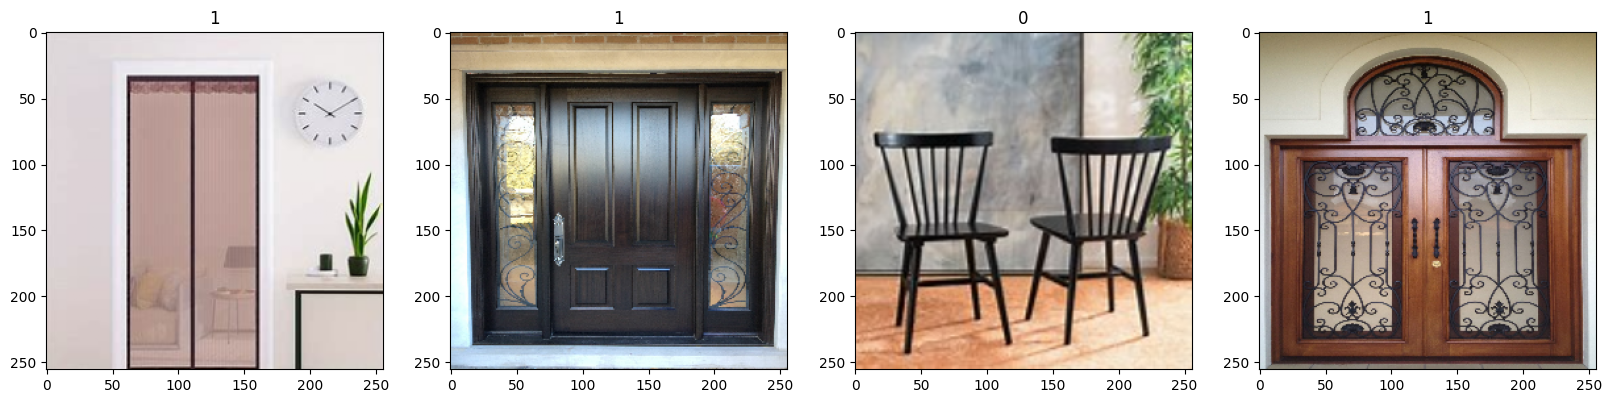

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# Splitting the dataset into a training set

We need a portion of the complete dataset to train the model, the following section splits the dataset.

In [ ]:
len(data)

9

In [ ]:
train_size = int(len(data)*.7) #
val_size = int(len(data)*.2)+1 #
test_size = int(len(data)*.1)+1 #

In [ ]:
print(train_size)
print(val_size)
print(test_size)
print(train_size + val_size + test_size)

6
2
1
9


We use ".take" and ."skip" to set the pieces

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
print(len(test))

6
2
1


# Building the model



Using the Sequential model of tensorflow, and the layers Conv2D, MaxPooling2D, Dense and Flatten, we build our model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
MaxPooling2D??

In [ ]:
# convolution is done with a (3,3) kernel and is moving 1 pixel at the time
# relu activation function. always positive
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # first layer needs input. convolution layer with 16 filters. condense image to be output class
model.add(MaxPooling2D()) # takes the max value after the relu activation and it is going to return the value

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # flat the data.  it will allow us to have only one value as output

model.add(Dense(256, activation='relu')) # fully connected layers
model.add(Dense(1, activation='sigmoid')) # final layer is a single Dense layer: sigmoid takes any value and convert it into a range of 0 or 1
# remember 0 and 1 are our classes :)


optimizers can be seen in:


```
tf.optimizer.
```



In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Training of the model

In [ ]:
logdir='/content/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# log the model training as train. you can use it to compare

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 26s 3s/step - loss: 0.7017 - accuracy: 0.6667 - val_loss: 0.6131 - val_accuracy: 0.6406
Epoch 2/20
6/6 [==============================] - 19s 2s/step - loss: 0.5818 - accuracy: 0.6354 - val_loss: 0.4798 - val_accuracy: 0.8125
Epoch 3/20
6/6 [==============================] - 17s 2s/step - loss: 0.4455 - accuracy: 0.8073 - val_loss: 0.3077 - val_accuracy: 0.8594
Epoch 4/20
6/6 [==============================] - 16s 3s/step - loss: 0.3225 - accuracy: 0.8750 - val_loss: 0.2151 - val_accuracy: 0.9062
Epoch 5/20
6/6 [==============================] - 18s 3s/step - loss: 0.3164 - accuracy: 0.8490 - val_loss: 0.3502 - val_accuracy: 0.8125
Epoch 6/20
6/6 [==============================] - 19s 3s/step - loss: 0.2488 - accuracy: 0.9115 - val_loss: 0.1758 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 18s 3s/step - loss: 0.2174 - accuracy: 0.9323 - val_loss: 0.2063 - val_accuracy: 0.9375
Epoch 8/20
6/6 [==================

# PERFORMANCE EVALUATION

In [ ]:
hist.history

{'loss': [0.7016844153404236,
  0.5817857980728149,
  0.44553956389427185,
  0.3225434124469757,
  0.3163904845714569,
  0.2487960308790207,
  0.21741853654384613,
  0.15952758491039276,
  0.1334839165210724,
  0.0882863998413086,
  0.0817008763551712,
  0.07142604142427444,
  0.05542364344000816,
  0.08889196068048477,
  0.08244499564170837,
  0.04798607900738716,
  0.07576495409011841,
  0.07797419279813766,
  0.0750315710902214,
  0.08779970556497574],
 'accuracy': [0.6666666865348816,
  0.6354166865348816,
  0.8072916865348816,
  0.875,
  0.8489583134651184,
  0.9114583134651184,
  0.9322916865348816,
  0.9375,
  0.9479166865348816,
  0.96875,
  0.96875,
  0.9791666865348816,
  0.984375,
  0.9739583134651184,
  0.953125,
  0.984375,
  0.96875,
  0.9583333134651184,
  0.9583333134651184,
  0.96875],
 'val_loss': [0.6130855679512024,
  0.479777991771698,
  0.30774158239364624,
  0.21505381166934967,
  0.35022252798080444,
  0.1757529377937317,
  0.20633849501609802,
  0.1275631189346

#Plotting the performance

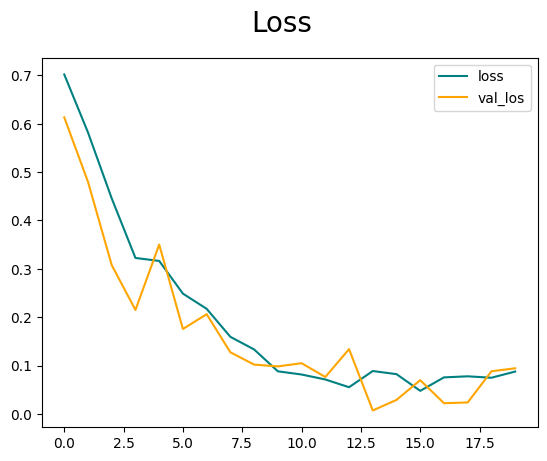

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_los')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

If "loss" is decreasing, and "val_los" is increasing, it indicates that the model has overfitting. We can see that in the final epoch, the behavior of the graph is unnatural

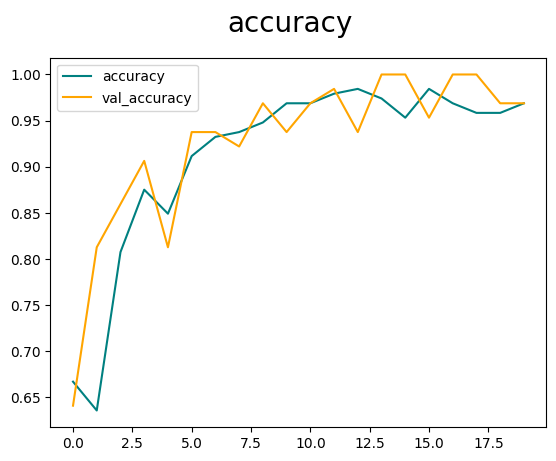

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# PERFORMANCE

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 292ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


A higher value indicates bettter performance. The values are arranged from 0 to 1.

# TESTING THE MODEL

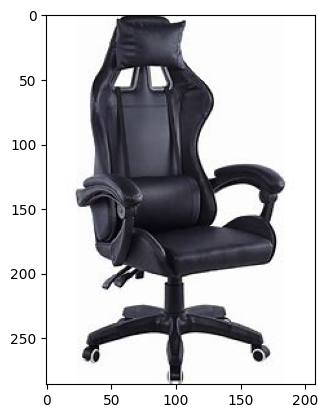

In [ ]:
img = cv2.imread('/content/OPHS.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

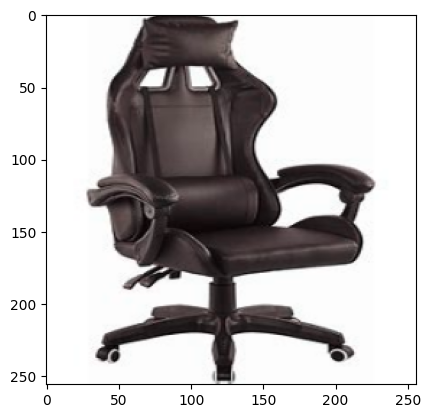

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 25

In [ ]:
# pass it to the neural network, use some tips like putting the image inside a list
np.expand_dims(resize,0)

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [ ]:
yhat

array([[0.03916507]], dtype=float32)

its a Chair


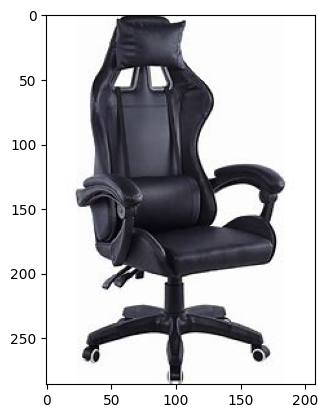

In [ ]:
if yhat > 0.05:
  print(f'its a Door')
else:
  print(f'its a Chair')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Importing the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Models','supervisedV1.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/drive/MyDrive/Models/supervisedV1.h5')

In [ ]:
new_model

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 112ms/step


its a Chair


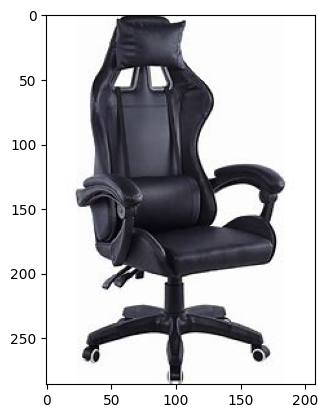

In [ ]:
if yhat_new > 0.05:
  print(f'its a Door')
else:
  print(f'its a Chair')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Conclusions and next steps

The model is able to reliably differentiate between chairs and doors, we can also plot the performance of the model to analyze it and make changes to try and get it to be more accurate.

The next step would be to make the model identify other types of furniture, such as tables, cupboards, sofas, and more. We need to upgrade the number of items the robot can identify so that it can navigate around obstacles better.

# Changes to the original project

Neural networks are complicated to create and the more labels the more complex the model will be, more computational power needs, more space to store, more changes need to be done. We had to limit for now the model to only classify between "chair" and "door" because more classes would give more problems. We planned to do it from scratch, but we realized that it was too difficult to then implement the computer vision and we decided to better use TensorFlow APIs and Keras. These two libraries helped us a lot and allowed us to create a model with less steps.

Another change is that we did not record video because Colab does not allow but in the future, it is possible to run the code in Visual Studio code for it.

Another problem found is the generation of a multi class dataset takes a lot of time and space. Colab is limited in the free version so we could not implement large data set and high-resolution images.

Originally the code would make a box to mark the detected object, this was not implemented because it requires a different type of labelling and until late stages, we realize it.
